# The Spark Foundation

## Task 1:Predicting Supervised ML

predict the percentage of an student based on no.of study hour

# Data Source : - http://bit.ly/w-data¶

# Author - Nicholas Arockiaraj D

# GRIP JULY2021 - Data Science and Business Analytics Intern

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull == True

False

There is no null in the dataset

# Visualize our data.

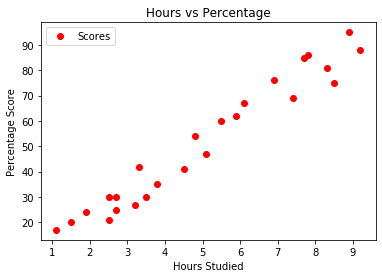

In [8]:
data.plot(x='Hours', y='Scores',style='o',c='red' )
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [10]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

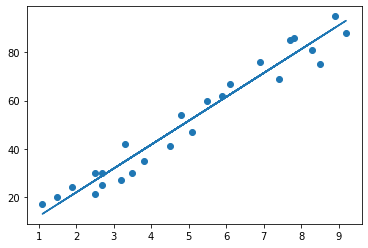

In [12]:
# Plotting the line of regression.

line= LR.coef_*x+LR.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [13]:
# Making predictions.

print(x_test)
y_pred= LR.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing actual values with predicted.

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluation of algorithm.

In [15]:
# Evaluating the algorithm.

from sklearn import metrics
print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error =  4.183859899002975


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
hours = 9.25
test= np.array([hours])
test= test.reshape(-1,1)
own_pred = LR.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


it seems acccording to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.